In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: PKX
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


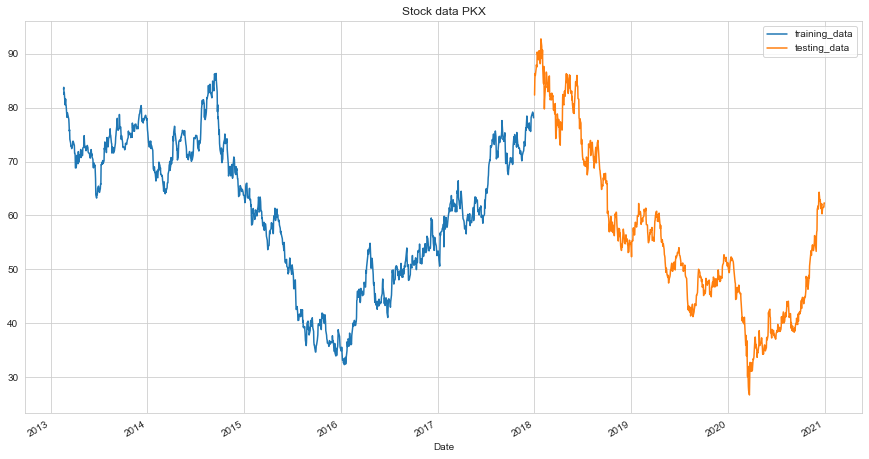

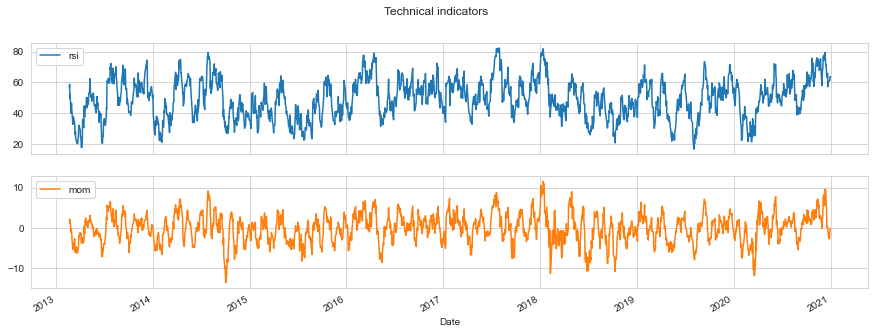

In [2]:
stock_name = 'pkx'.upper()
industry = 'Basic Materials'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1154.22, duration: 0:00:00.393090
episode: 2/2000, episode end value: 1156.85, duration: 0:00:00.341078
episode: 3/2000, episode end value: 1166.34, duration: 0:00:00.459103
episode: 4/2000, episode end value: 1158.16, duration: 0:00:00.369084
episode: 5/2000, episode end value: 1181.36, duration: 0:00:00.427096
episode: 6/2000, episode end value: 1142.95, duration: 0:00:00.318071
episode: 7/2000, episode end value: 1145.90, duration: 0:00:00.272062
episode: 8/2000, episode end value: 1121.00, duration: 0:00:00.255058
episode: 9/2000, episode end value: 1186.96, duration: 0:00:00.294063
episode: 10/2000, episode end value: 1194.33, duration: 0:00:00.232050
episode: 11/2000, episode end value: 1235.46, duration: 0:00:00.251060
episode: 12/2000, episode end value: 1173.10, duration: 0:00:00.265056
episode: 13/2000, episode end value: 1179.92, duration: 0:00:00.287063
episode: 14/2000, episode end value: 1121.75, duration: 0:00:00.264059
episode: 15/200

episode: 117/2000, episode end value: 1205.73, duration: 0:00:00.423095
episode: 118/2000, episode end value: 1225.39, duration: 0:00:00.433101
episode: 119/2000, episode end value: 1208.51, duration: 0:00:00.409090
episode: 120/2000, episode end value: 1181.65, duration: 0:00:00.516116
episode: 121/2000, episode end value: 1178.09, duration: 0:00:00.481107
episode: 122/2000, episode end value: 1171.16, duration: 0:00:00.460105
episode: 123/2000, episode end value: 1401.54, duration: 0:00:00.327074
episode: 124/2000, episode end value: 1152.51, duration: 0:00:00.519120
episode: 125/2000, episode end value: 1168.54, duration: 0:00:00.426096
episode: 126/2000, episode end value: 1212.17, duration: 0:00:00.384088
episode: 127/2000, episode end value: 1245.32, duration: 0:00:00.370082
episode: 128/2000, episode end value: 1165.38, duration: 0:00:00.388092
episode: 129/2000, episode end value: 1352.83, duration: 0:00:00.348079
episode: 130/2000, episode end value: 1174.90, duration: 0:00:00

episode: 231/2000, episode end value: 1209.95, duration: 0:00:00.399163
episode: 232/2000, episode end value: 1286.57, duration: 0:00:00.432642
episode: 233/2000, episode end value: 1181.81, duration: 0:00:00.405353
episode: 234/2000, episode end value: 1171.26, duration: 0:00:00.405093
episode: 235/2000, episode end value: 1207.71, duration: 0:00:00.412097
episode: 236/2000, episode end value: 1151.06, duration: 0:00:00.473104
episode: 237/2000, episode end value: 1138.21, duration: 0:00:00.526121
episode: 238/2000, episode end value: 1185.08, duration: 0:00:00.430093
episode: 239/2000, episode end value: 1133.70, duration: 0:00:00.453100
episode: 240/2000, episode end value: 1135.64, duration: 0:00:00.383086
episode: 241/2000, episode end value: 1183.21, duration: 0:00:00.480108
episode: 242/2000, episode end value: 1157.60, duration: 0:00:00.437101
episode: 243/2000, episode end value: 1123.33, duration: 0:00:00.397090
episode: 244/2000, episode end value: 1343.31, duration: 0:00:00

episode: 345/2000, episode end value: 1177.58, duration: 0:00:00.442101
episode: 346/2000, episode end value: 1250.75, duration: 0:00:00.469101
episode: 347/2000, episode end value: 1331.72, duration: 0:00:00.278065
episode: 348/2000, episode end value: 1156.21, duration: 0:00:00.496114
episode: 349/2000, episode end value: 1147.01, duration: 0:00:00.480109
episode: 350/2000, episode end value: 1169.32, duration: 0:00:00.465105
episode: 351/2000, episode end value: 1158.47, duration: 0:00:00.532118
episode: 352/2000, episode end value: 1183.08, duration: 0:00:00.435097
episode: 353/2000, episode end value: 1211.44, duration: 0:00:00.475112
episode: 354/2000, episode end value: 1160.63, duration: 0:00:00.501108
episode: 355/2000, episode end value: 1163.53, duration: 0:00:00.456104
episode: 356/2000, episode end value: 1160.42, duration: 0:00:00.564129
episode: 357/2000, episode end value: 1148.86, duration: 0:00:00.453104
episode: 358/2000, episode end value: 1143.58, duration: 0:00:00

episode: 459/2000, episode end value: 1167.12, duration: 0:00:00.433094
episode: 460/2000, episode end value: 1385.43, duration: 0:00:00.401089
episode: 461/2000, episode end value: 1277.29, duration: 0:00:00.432098
episode: 462/2000, episode end value: 1170.36, duration: 0:00:00.495115
episode: 463/2000, episode end value: 1171.37, duration: 0:00:00.381086
episode: 464/2000, episode end value: 1222.79, duration: 0:00:00.360080
episode: 465/2000, episode end value: 1154.65, duration: 0:00:00.503117
episode: 466/2000, episode end value: 1139.40, duration: 0:00:00.420094
episode: 467/2000, episode end value: 1156.73, duration: 0:00:00.463098
episode: 468/2000, episode end value: 1146.27, duration: 0:00:00.441099
episode: 469/2000, episode end value: 1190.55, duration: 0:00:00.486109
episode: 470/2000, episode end value: 1177.43, duration: 0:00:00.480113
episode: 471/2000, episode end value: 1191.24, duration: 0:00:00.470101
episode: 472/2000, episode end value: 1152.83, duration: 0:00:00

episode: 573/2000, episode end value: 1154.26, duration: 0:00:00.405093
episode: 574/2000, episode end value: 1139.01, duration: 0:00:00.419099
episode: 575/2000, episode end value: 1136.90, duration: 0:00:00.404088
episode: 576/2000, episode end value: 1130.94, duration: 0:00:00.464105
episode: 577/2000, episode end value: 1151.34, duration: 0:00:00.461105
episode: 578/2000, episode end value: 1148.04, duration: 0:00:00.475104
episode: 579/2000, episode end value: 1217.77, duration: 0:00:00.405093
episode: 580/2000, episode end value: 1204.73, duration: 0:00:00.395089
episode: 581/2000, episode end value: 1146.14, duration: 0:00:00.553125
episode: 582/2000, episode end value: 1265.26, duration: 0:00:00.369083
episode: 583/2000, episode end value: 1145.14, duration: 0:00:00.451101
episode: 584/2000, episode end value: 1156.47, duration: 0:00:00.415100
episode: 585/2000, episode end value: 1147.75, duration: 0:00:00.422094
episode: 586/2000, episode end value: 1139.72, duration: 0:00:00

episode: 687/2000, episode end value: 1162.77, duration: 0:00:00.512117
episode: 688/2000, episode end value: 1205.62, duration: 0:00:00.399090
episode: 689/2000, episode end value: 1164.41, duration: 0:00:00.503119
episode: 690/2000, episode end value: 1176.39, duration: 0:00:00.548122
episode: 691/2000, episode end value: 1156.33, duration: 0:00:00.507115
episode: 692/2000, episode end value: 1157.88, duration: 0:00:00.418094
episode: 693/2000, episode end value: 1163.40, duration: 0:00:00.396096
episode: 694/2000, episode end value: 1152.55, duration: 0:00:00.451101
episode: 695/2000, episode end value: 1253.77, duration: 0:00:00.338069
episode: 696/2000, episode end value: 1459.78, duration: 0:00:00.275062
episode: 697/2000, episode end value: 1158.52, duration: 0:00:00.543153
episode: 698/2000, episode end value: 1160.43, duration: 0:00:00.571113
episode: 699/2000, episode end value: 1158.36, duration: 0:00:00.485110
episode: 700/2000, episode end value: 1216.48, duration: 0:00:00

episode: 801/2000, episode end value: 1132.04, duration: 0:00:00.417095
episode: 802/2000, episode end value: 1133.19, duration: 0:00:00.365604
episode: 803/2000, episode end value: 1152.25, duration: 0:00:00.368159
episode: 804/2000, episode end value: 1148.67, duration: 0:00:00.423038
episode: 805/2000, episode end value: 1130.82, duration: 0:00:00.398090
episode: 806/2000, episode end value: 1167.54, duration: 0:00:00.467106
episode: 807/2000, episode end value: 1152.66, duration: 0:00:00.392566
episode: 808/2000, episode end value: 1269.57, duration: 0:00:00.337042
episode: 809/2000, episode end value: 1382.02, duration: 0:00:00.361080
episode: 810/2000, episode end value: 1164.05, duration: 0:00:00.473107
episode: 811/2000, episode end value: 1161.14, duration: 0:00:00.421096
episode: 812/2000, episode end value: 1210.50, duration: 0:00:00.441099
episode: 813/2000, episode end value: 1232.02, duration: 0:00:00.429097
episode: 814/2000, episode end value: 1160.82, duration: 0:00:00

episode: 915/2000, episode end value: 1195.10, duration: 0:00:00.402694
episode: 916/2000, episode end value: 1258.40, duration: 0:00:00.412205
episode: 917/2000, episode end value: 1163.43, duration: 0:00:00.532861
episode: 918/2000, episode end value: 1173.79, duration: 0:00:00.393095
episode: 919/2000, episode end value: 1264.87, duration: 0:00:00.374079
episode: 920/2000, episode end value: 1222.73, duration: 0:00:00.387086
episode: 921/2000, episode end value: 1171.78, duration: 0:00:00.373741
episode: 922/2000, episode end value: 1223.36, duration: 0:00:00.406193
episode: 923/2000, episode end value: 1151.29, duration: 0:00:00.486111
episode: 924/2000, episode end value: 1202.47, duration: 0:00:00.411090
episode: 925/2000, episode end value: 1171.88, duration: 0:00:00.452106
episode: 926/2000, episode end value: 1180.72, duration: 0:00:00.428099
episode: 927/2000, episode end value: 1132.86, duration: 0:00:00.396085
episode: 928/2000, episode end value: 1162.79, duration: 0:00:00

episode: 1029/2000, episode end value: 1146.70, duration: 0:00:00.464438
episode: 1030/2000, episode end value: 1223.39, duration: 0:00:00.410538
episode: 1031/2000, episode end value: 1147.95, duration: 0:00:00.453101
episode: 1032/2000, episode end value: 1150.97, duration: 0:00:00.427098
episode: 1033/2000, episode end value: 1171.07, duration: 0:00:00.478106
episode: 1034/2000, episode end value: 1175.58, duration: 0:00:00.478105
episode: 1035/2000, episode end value: 1174.89, duration: 0:00:00.431097
episode: 1036/2000, episode end value: 1143.74, duration: 0:00:00.356086
episode: 1037/2000, episode end value: 1164.08, duration: 0:00:00.420100
episode: 1038/2000, episode end value: 1470.99, duration: 0:00:00.394083
episode: 1039/2000, episode end value: 1161.44, duration: 0:00:00.594136
episode: 1040/2000, episode end value: 1152.64, duration: 0:00:00.518115
episode: 1041/2000, episode end value: 1162.83, duration: 0:00:00.483106
episode: 1042/2000, episode end value: 1175.07, dur

episode: 1142/2000, episode end value: 1202.99, duration: 0:00:00.433079
episode: 1143/2000, episode end value: 1209.12, duration: 0:00:00.409089
episode: 1144/2000, episode end value: 1216.88, duration: 0:00:00.438099
episode: 1145/2000, episode end value: 1201.99, duration: 0:00:00.487105
episode: 1146/2000, episode end value: 1167.34, duration: 0:00:00.507113
episode: 1147/2000, episode end value: 1182.26, duration: 0:00:00.412089
episode: 1148/2000, episode end value: 1250.10, duration: 0:00:00.415093
episode: 1149/2000, episode end value: 1148.58, duration: 0:00:00.448101
episode: 1150/2000, episode end value: 1189.29, duration: 0:00:00.444099
episode: 1151/2000, episode end value: 1280.25, duration: 0:00:00.412092
episode: 1152/2000, episode end value: 1151.70, duration: 0:00:00.521118
episode: 1153/2000, episode end value: 1161.04, duration: 0:00:00.405093
episode: 1154/2000, episode end value: 1172.25, duration: 0:00:00.427098
episode: 1155/2000, episode end value: 1161.09, dur

episode: 1255/2000, episode end value: 1192.17, duration: 0:00:00.423096
episode: 1256/2000, episode end value: 1186.93, duration: 0:00:00.382085
episode: 1257/2000, episode end value: 1168.58, duration: 0:00:00.396089
episode: 1258/2000, episode end value: 1193.59, duration: 0:00:00.369081
episode: 1259/2000, episode end value: 1173.02, duration: 0:00:00.432097
episode: 1260/2000, episode end value: 1372.17, duration: 0:00:00.336076
episode: 1261/2000, episode end value: 1215.02, duration: 0:00:00.396092
episode: 1262/2000, episode end value: 1154.72, duration: 0:00:00.450106
episode: 1263/2000, episode end value: 1142.02, duration: 0:00:00.434091
episode: 1264/2000, episode end value: 1198.28, duration: 0:00:00.359085
episode: 1265/2000, episode end value: 1164.83, duration: 0:00:00.400087
episode: 1266/2000, episode end value: 1158.14, duration: 0:00:00.360082
episode: 1267/2000, episode end value: 1174.36, duration: 0:00:00.389083
episode: 1268/2000, episode end value: 1170.45, dur

episode: 1368/2000, episode end value: 1149.24, duration: 0:00:00.413094
episode: 1369/2000, episode end value: 1166.40, duration: 0:00:00.358081
episode: 1370/2000, episode end value: 1155.44, duration: 0:00:00.422092
episode: 1371/2000, episode end value: 1226.98, duration: 0:00:00.432094
episode: 1372/2000, episode end value: 1166.10, duration: 0:00:00.481108
episode: 1373/2000, episode end value: 1187.45, duration: 0:00:00.349079
episode: 1374/2000, episode end value: 1163.41, duration: 0:00:00.406087
episode: 1375/2000, episode end value: 1310.94, duration: 0:00:00.326078
episode: 1376/2000, episode end value: 1175.36, duration: 0:00:00.453098
episode: 1377/2000, episode end value: 1146.59, duration: 0:00:00.500115
episode: 1378/2000, episode end value: 1215.29, duration: 0:00:00.455103
episode: 1379/2000, episode end value: 1181.01, duration: 0:00:00.442102
episode: 1380/2000, episode end value: 1204.85, duration: 0:00:00.355083
episode: 1381/2000, episode end value: 1178.57, dur

episode: 1481/2000, episode end value: 1151.27, duration: 0:00:00.398089
episode: 1482/2000, episode end value: 1177.87, duration: 0:00:00.396092
episode: 1483/2000, episode end value: 1165.75, duration: 0:00:00.412091
episode: 1484/2000, episode end value: 1195.81, duration: 0:00:00.472102
episode: 1485/2000, episode end value: 1161.35, duration: 0:00:00.349078
episode: 1486/2000, episode end value: 1145.28, duration: 0:00:00.379087
episode: 1487/2000, episode end value: 1193.65, duration: 0:00:00.393088
episode: 1488/2000, episode end value: 1167.55, duration: 0:00:00.445106
episode: 1489/2000, episode end value: 1160.25, duration: 0:00:00.394084
episode: 1490/2000, episode end value: 1203.62, duration: 0:00:00.395095
episode: 1491/2000, episode end value: 1148.70, duration: 0:00:00.424093
episode: 1492/2000, episode end value: 1209.57, duration: 0:00:00.367083
episode: 1493/2000, episode end value: 1149.73, duration: 0:00:00.461105
episode: 1494/2000, episode end value: 1359.91, dur

episode: 1594/2000, episode end value: 1128.46, duration: 0:00:00.373084
episode: 1595/2000, episode end value: 1173.66, duration: 0:00:00.331080
episode: 1596/2000, episode end value: 1164.57, duration: 0:00:00.390090
episode: 1597/2000, episode end value: 1222.79, duration: 0:00:00.305065
episode: 1598/2000, episode end value: 1208.39, duration: 0:00:00.250062
episode: 1599/2000, episode end value: 1251.48, duration: 0:00:00.398089
episode: 1600/2000, episode end value: 1160.86, duration: 0:00:00.387086
episode: 1601/2000, episode end value: 1162.85, duration: 0:00:00.352080
episode: 1602/2000, episode end value: 1209.49, duration: 0:00:00.423091
episode: 1603/2000, episode end value: 1154.37, duration: 0:00:00.452101
episode: 1604/2000, episode end value: 1153.30, duration: 0:00:00.390085
episode: 1605/2000, episode end value: 1383.00, duration: 0:00:00.267061
episode: 1606/2000, episode end value: 1164.49, duration: 0:00:00.362088
episode: 1607/2000, episode end value: 1141.80, dur

episode: 1707/2000, episode end value: 1129.85, duration: 0:00:00.372085
episode: 1708/2000, episode end value: 1344.20, duration: 0:00:00.324074
episode: 1709/2000, episode end value: 1158.21, duration: 0:00:00.311068
episode: 1710/2000, episode end value: 1161.58, duration: 0:00:00.368083
episode: 1711/2000, episode end value: 1152.33, duration: 0:00:00.295079
episode: 1712/2000, episode end value: 1194.89, duration: 0:00:00.397091
episode: 1713/2000, episode end value: 1132.18, duration: 0:00:00.391089
episode: 1714/2000, episode end value: 1129.84, duration: 0:00:00.402091
episode: 1715/2000, episode end value: 1123.79, duration: 0:00:00.319073
episode: 1716/2000, episode end value: 1185.60, duration: 0:00:00.363078
episode: 1717/2000, episode end value: 1165.97, duration: 0:00:00.386089
episode: 1718/2000, episode end value: 1201.65, duration: 0:00:00.318075
episode: 1719/2000, episode end value: 1160.95, duration: 0:00:00.318065
episode: 1720/2000, episode end value: 1149.35, dur

episode: 1820/2000, episode end value: 1170.49, duration: 0:00:00.359084
episode: 1821/2000, episode end value: 1140.27, duration: 0:00:00.332080
episode: 1822/2000, episode end value: 1272.36, duration: 0:00:00.283066
episode: 1823/2000, episode end value: 1191.34, duration: 0:00:00.359075
episode: 1824/2000, episode end value: 1148.63, duration: 0:00:00.349081
episode: 1825/2000, episode end value: 1236.96, duration: 0:00:00.318077
episode: 1826/2000, episode end value: 1167.36, duration: 0:00:00.386082
episode: 1827/2000, episode end value: 1165.26, duration: 0:00:00.308068
episode: 1828/2000, episode end value: 1147.13, duration: 0:00:00.344077
episode: 1829/2000, episode end value: 1151.85, duration: 0:00:00.343082
episode: 1830/2000, episode end value: 1222.06, duration: 0:00:00.323069
episode: 1831/2000, episode end value: 1158.99, duration: 0:00:00.360082
episode: 1832/2000, episode end value: 1180.37, duration: 0:00:00.380085
episode: 1833/2000, episode end value: 1163.48, dur

episode: 1933/2000, episode end value: 1148.81, duration: 0:00:00.298068
episode: 1934/2000, episode end value: 1140.70, duration: 0:00:00.284064
episode: 1935/2000, episode end value: 1225.63, duration: 0:00:00.275066
episode: 1936/2000, episode end value: 1173.24, duration: 0:00:00.266052
episode: 1937/2000, episode end value: 1141.26, duration: 0:00:00.296067
episode: 1938/2000, episode end value: 1133.99, duration: 0:00:00.270062
episode: 1939/2000, episode end value: 1130.90, duration: 0:00:00.270061
episode: 1940/2000, episode end value: 1112.91, duration: 0:00:00.282065
episode: 1941/2000, episode end value: 1157.74, duration: 0:00:00.262057
episode: 1942/2000, episode end value: 1165.58, duration: 0:00:00.290069
episode: 1943/2000, episode end value: 1171.49, duration: 0:00:00.266057
episode: 1944/2000, episode end value: 1128.44, duration: 0:00:00.271083
episode: 1945/2000, episode end value: 1165.77, duration: 0:00:00.267044
episode: 1946/2000, episode end value: 1157.86, dur

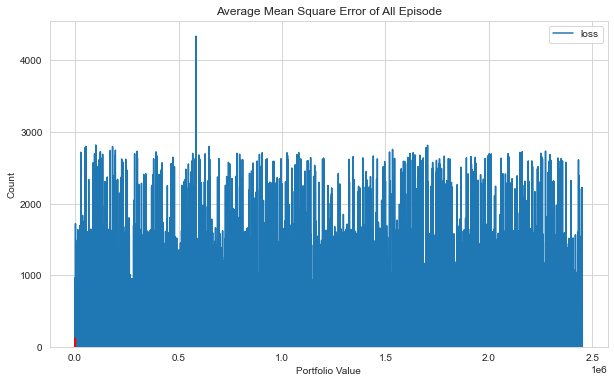

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

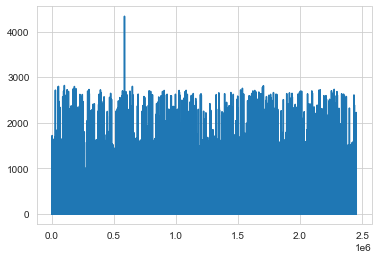

In [5]:
plt.plot(agent.model.losses)

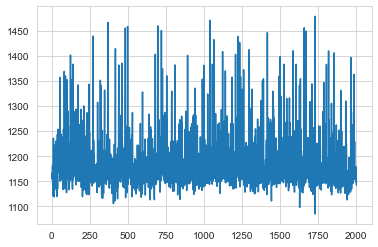

In [6]:
plt.plot(portfolio_value)

episode end value: 1012.93, duration: 0:00:00.100020
Sell: 208 times, Buy: 221 times


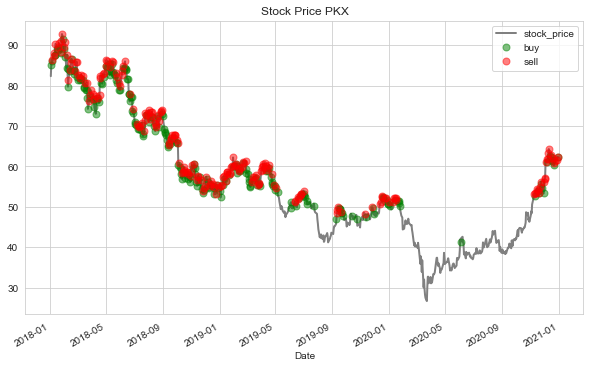

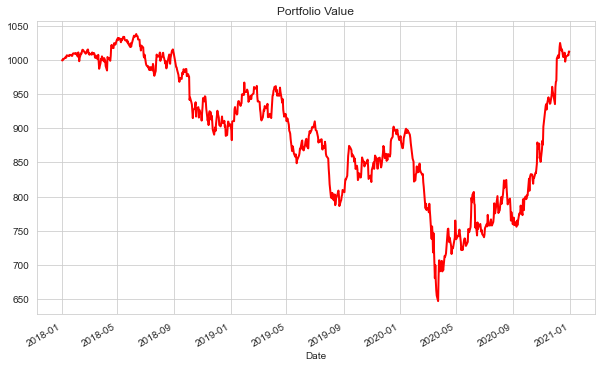

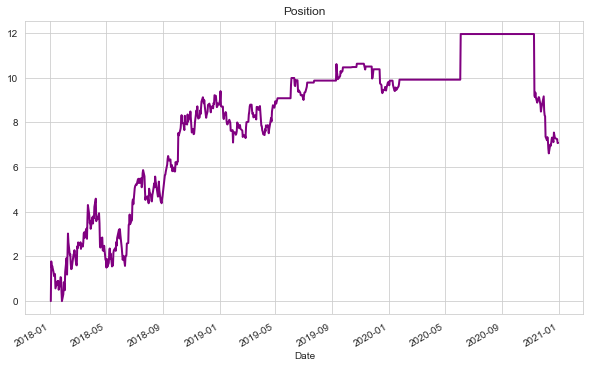

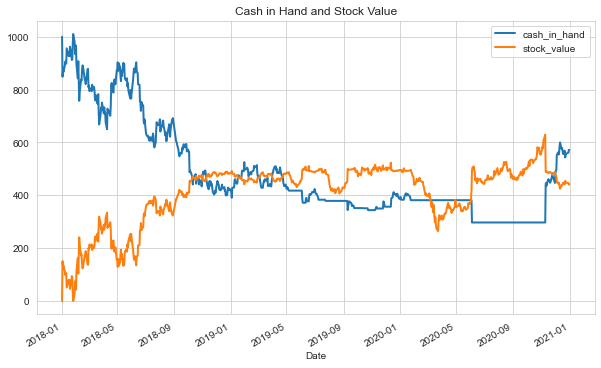

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: PKX
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 0.43 %
Volatility: 0.1790
shape ratio: -0.0375
Maximun drawdown: -37.78 %
Calmar ratio: 0.0114
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -8.88 %
Volatility (benchmark): 0.3710
shape ratio: -0.2689
Maximun drawdown: -71.23 %
Calmar ratio (benchmark): -0.1246


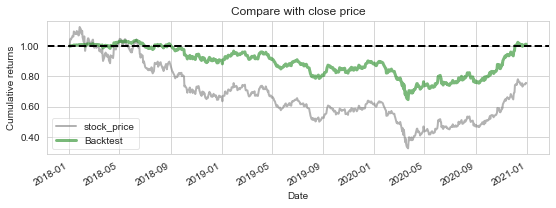

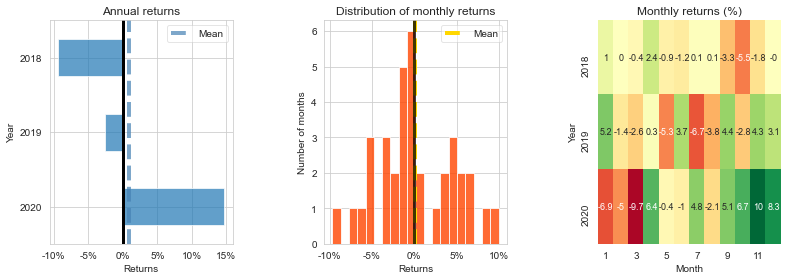

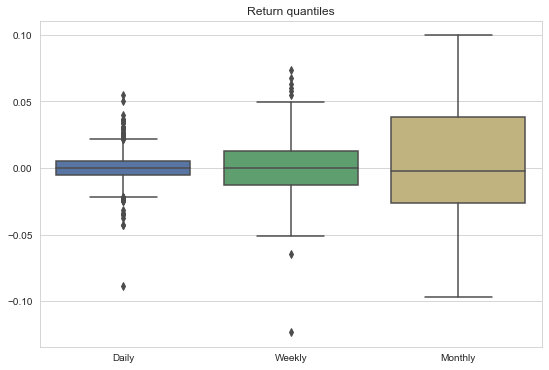

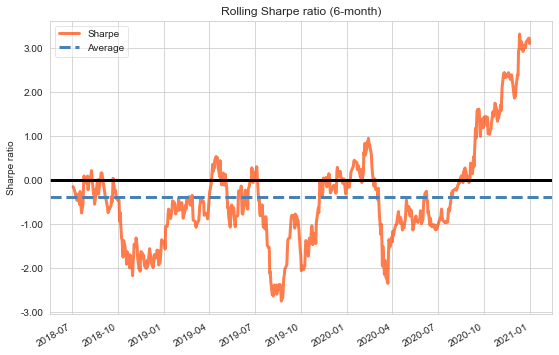

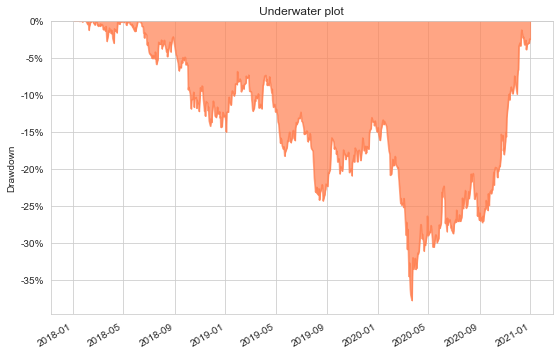

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')